In [1]:
import pandas as pd

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_can=pd.read_excel("https://bit.ly/32HXvZB",sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can['Total'] = df_can.sum(axis=1)
df_can['Total']

C:\Users\admin\AppData\Local\Temp\ipykernel_12868\1768119263.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


0      117278
1       31398
2      138878
3          12
4          30
        ...  
190    194292
191         4
192      5970
193      3354
194     17196
Name: Total, Length: 195, dtype: int64

In [6]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)

In [7]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,30


In [8]:
df_can.index.name = None
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))

### Question 1: Plot a line graph of immigration from Haiti

<AxesSubplot:>

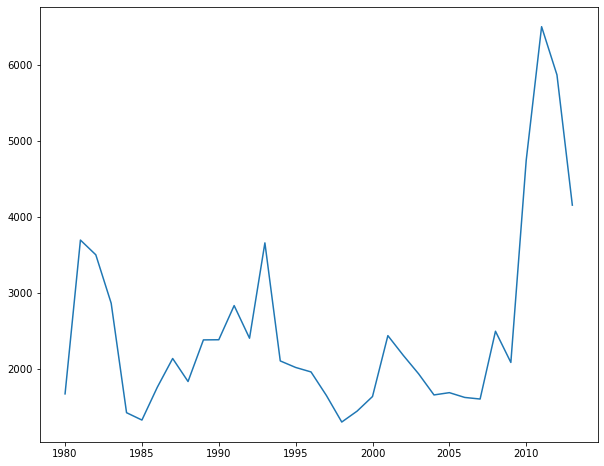

In [12]:
haiti = df_can.loc['Haiti', years] 

haiti.plot(figsize=(10,8))

### Question 2: Add title, label for x-axis, label for y-axis

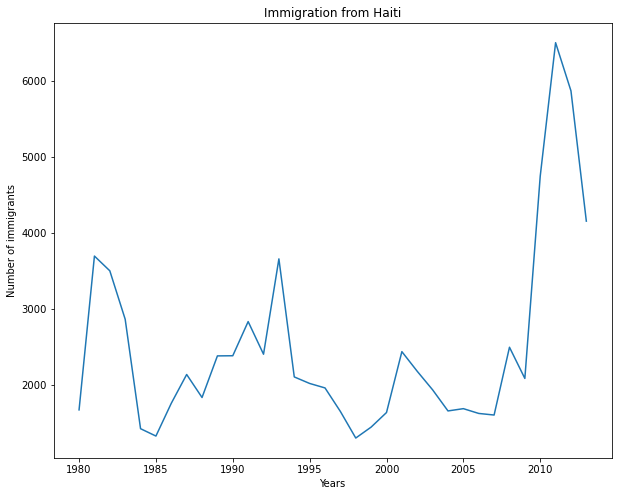

In [93]:
haiti.plot(figsize=(10, 8))

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

### Question 3: add text and try coordinate

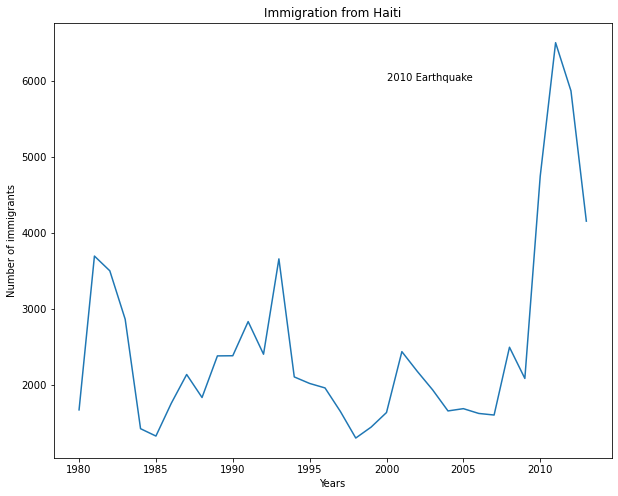

In [94]:
haiti.index = haiti.index.map(int)

haiti.plot(figsize=(10, 8))

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(2000,6000, '2010 Earthquake')

plt.show()

### Question 4: Compare the number of immigrants from India and China

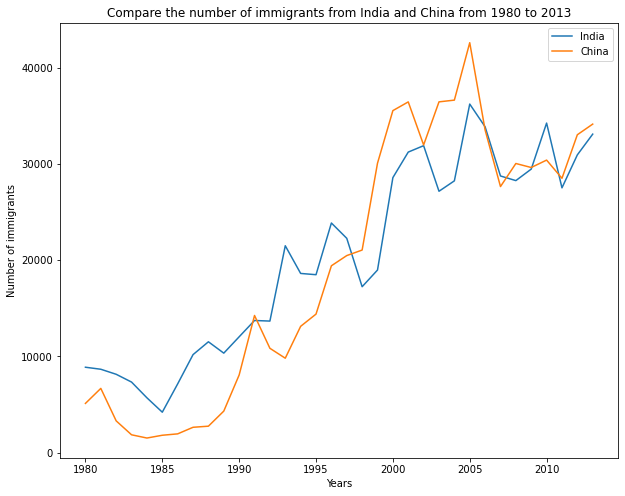

In [95]:
df_compare = df_can.loc[['India', 'China'], years].transpose()

df_compare.plot(kind='line', figsize=(10, 8))

plt.title('Compare the number of immigrants from India and China from 1980 to 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

### 2) Create a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013.

In [13]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df_can.head(5)

df_top5 = df_top5[years].transpose()
df_top5.head()


,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


### Question 1: Produce the area plots (set stacked=False)


<AxesSubplot:>

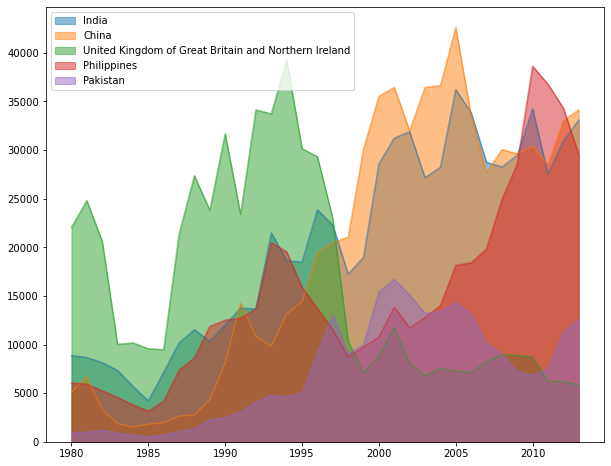

In [15]:
df_top5.plot(kind= 'area',figsize=(10, 8), stacked = False)

### Question 2: Produce similar area plots for the bottom five countries which have immigrants to Canada.

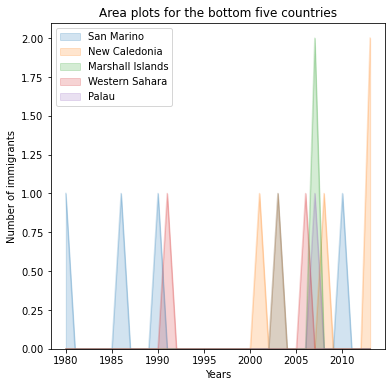

In [18]:
df_bottom = df_can.tail(5)

df_bottom = df_bottom[years].transpose()

df_bottom.index = df_top5.index.map(int)

df_bottom.plot(kind='area', stacked = False, alpha= 0.2, figsize=(6,6))

plt.title('Area plots for the bottom five countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

## 3) histrogram plot

In [21]:
import numpy as np

In [22]:
count, bin_edges = np.histogram(df_can['2013'])
print(count)

[178  11   1   2   0   0   0   0   1   2]


In [23]:
bin_edges

array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
       23890.3, 27303.2, 30716.1, 34129. ])

### Question 1: Use pandas plot to produce a histogram for Canada in 2013

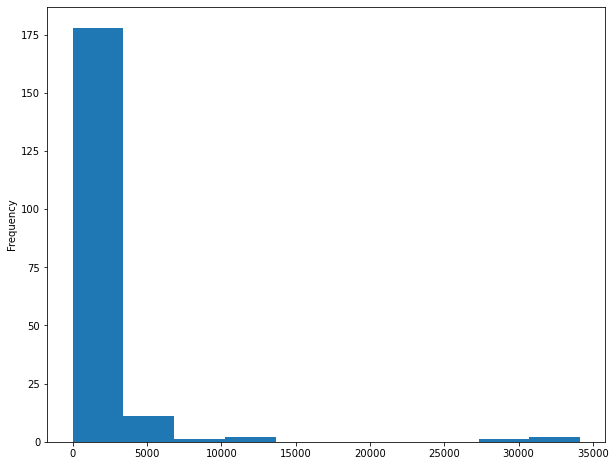

In [24]:
df_can['2013'].plot(kind='hist',figsize=(10, 8))

plt.show()

### Question 2: Use pandas plot and the bin edges to produce a histogram for Canada in 2013


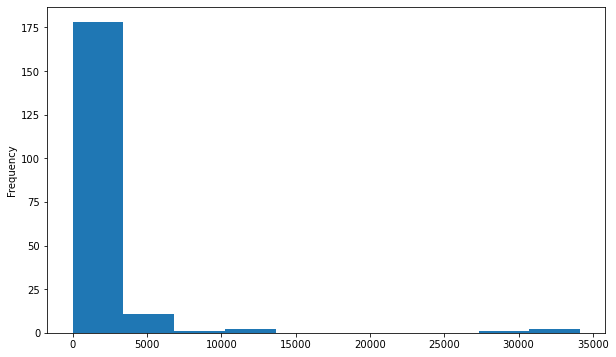

In [25]:
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', bins = bin_edges, figsize=(10, 6))

plt.show()

# 4) What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013 ?

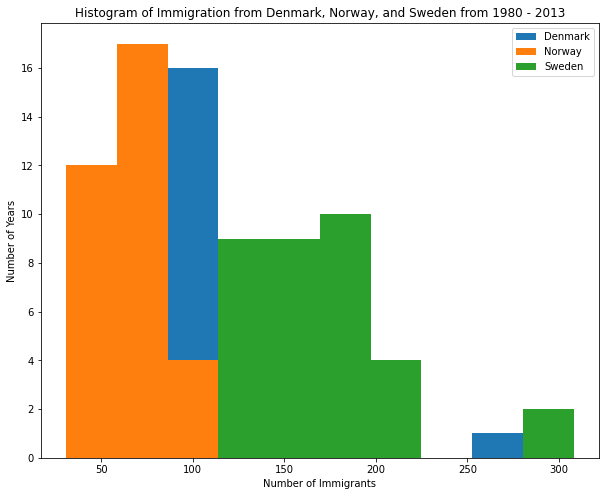

In [26]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()
 
df_t.plot(kind='hist', figsize=(10, 8))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

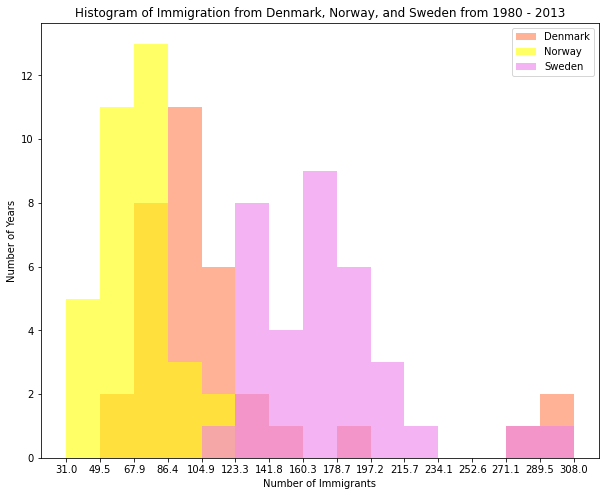

In [28]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind ='hist',
figsize=(10, 8),
bins=15,
alpha=0.6,
xticks=bin_edges,
color=['coral', 'yellow', 'violet'] )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

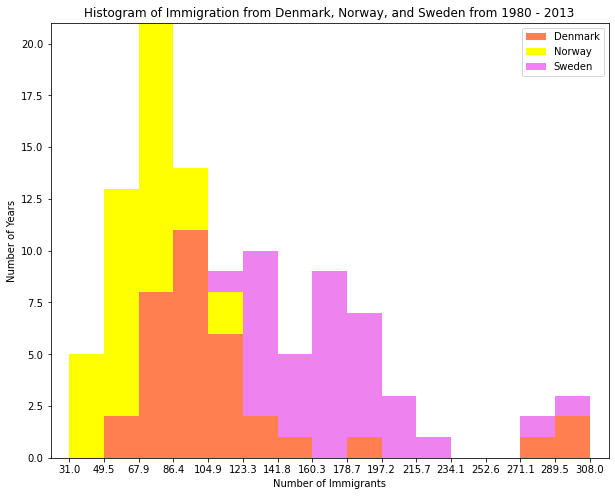

In [29]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10 

df_t.plot(kind='hist',
figsize=(10, 8),
bins=15,
xticks=bin_edges,
color=['coral', 'yellow', 'violet'],
stacked=True,
xlim=(xmin, xmax)
)
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

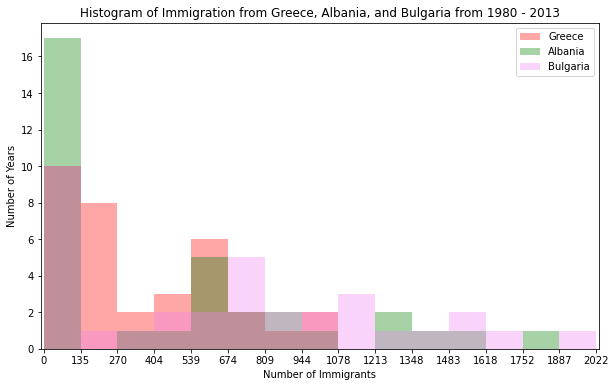

In [107]:
df_t = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()

count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10 

df_t.plot(kind ='hist', figsize=(10, 6), bins=15, alpha=0.35, xticks=bin_edges, stacked=False, color=['red', 'green', 'violet'],xlim=(xmin, xmax))
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years') 
plt.xlabel('Number of Immigrants')
plt.show()


## 5) Bar Charts
Question: Create a horizontal bar plot showing the total number of immigrants to
Canada from the top 15 countries, for the period 1980 - 2013. Label each country
with the total immigrant count

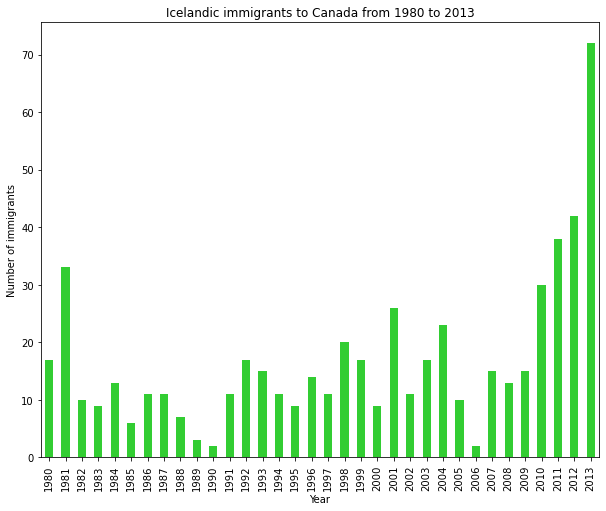

In [108]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

df_iceland.plot(kind='bar', figsize=(10, 8), color='limegreen')
plt.xlabel('Year') 
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 
plt.show()


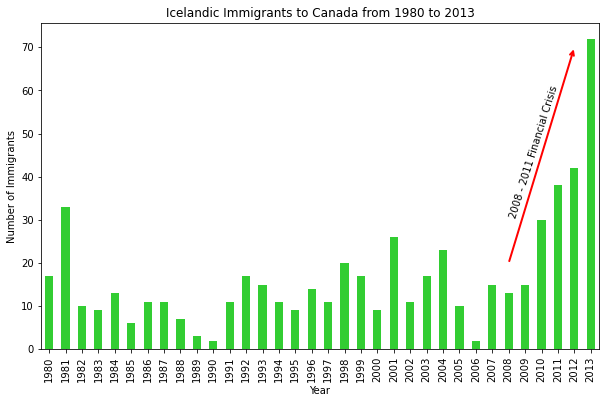

In [109]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90, color ='limegreen') 
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.annotate('',
             xy=(32, 70),
             xytext=(28, 20),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3',color='red', lw=2)
            )

plt.annotate('2008 - 2011 Financial Crisis',
             xy=(28, 30),
             rotation=72.5,
             va='bottom',
             ha='left'
            )

plt.show()


# Horizontal Bar Plot

In [110]:
df_can.sort_values(by='Total', ascending=True, axis=0, inplace=True)

df_top15 = df_can['Total'].tail(15)
df_top15

Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

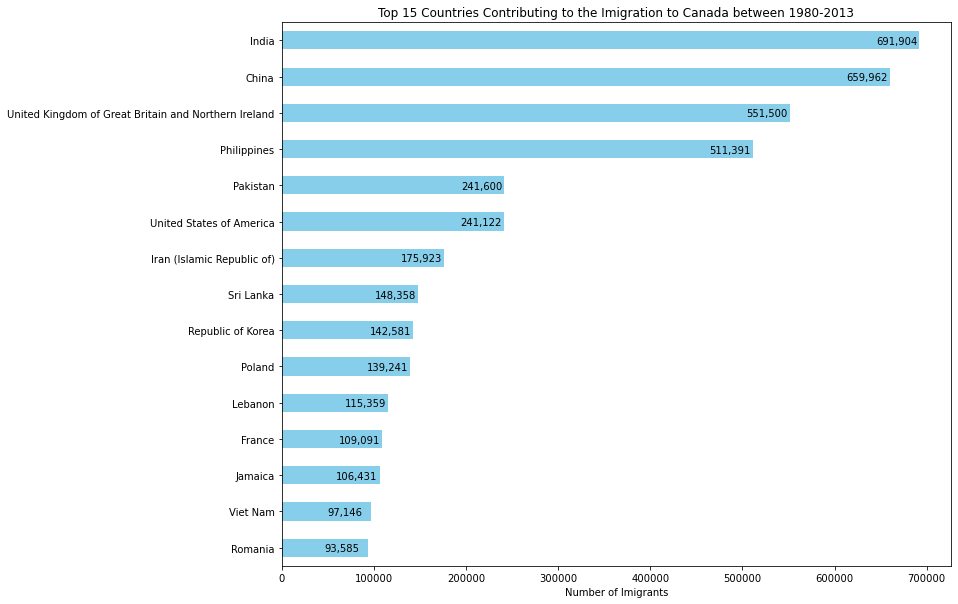

In [111]:
df_top15.plot(kind= 'barh',figsize=(12,10), color = 'skyblue')
plt.title('Top 15 Countries Contributing to the Imigration to Canada between 1980-2013')
plt.xlabel('Number of Imigrants')

for index, value in enumerate(df_top15):
    label = format(int(value), ',')
    
    plt.annotate(label, xy=(value - 47000, index - 0.10), color = 'black')
    
plt.show()